In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [65]:
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [66]:
df = pd.read_csv('/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [67]:
df = df.rename(columns={
    "X1": "Compactness",
    "X2": "Surface",
    "X3": "Wall",
    "X4": "Roof",
    "X5": "Height",
    "X6": "Orient",
    "X7": "Glazing",
    "X8": "GlazingDist",
    "Y1": "HeatingLoad",
    "Y2": "CoolingLoad"
})

df.head()

,Compactness,Surface,Wall,Roof,Height,Orient,Glazing,GlazingDist,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compactness  768 non-null    float64
 1   Surface      768 non-null    float64
 2   Wall         768 non-null    float64
 3   Roof         768 non-null    float64
 4   Height       768 non-null    float64
 5   Orient       768 non-null    int64  
 6   Glazing      768 non-null    float64
 7   GlazingDist  768 non-null    int64  
 8   HeatingLoad  768 non-null    float64
 9   CoolingLoad  768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [69]:
df.describe()

,Compactness,Surface,Wall,Roof,Height,Orient,Glazing,GlazingDist,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [70]:
df.isna().sum()

Compactness    0
Surface        0
Wall           0
Roof           0
Height         0
Orient         0
Glazing        0
GlazingDist    0
HeatingLoad    0
CoolingLoad    0
dtype: int64

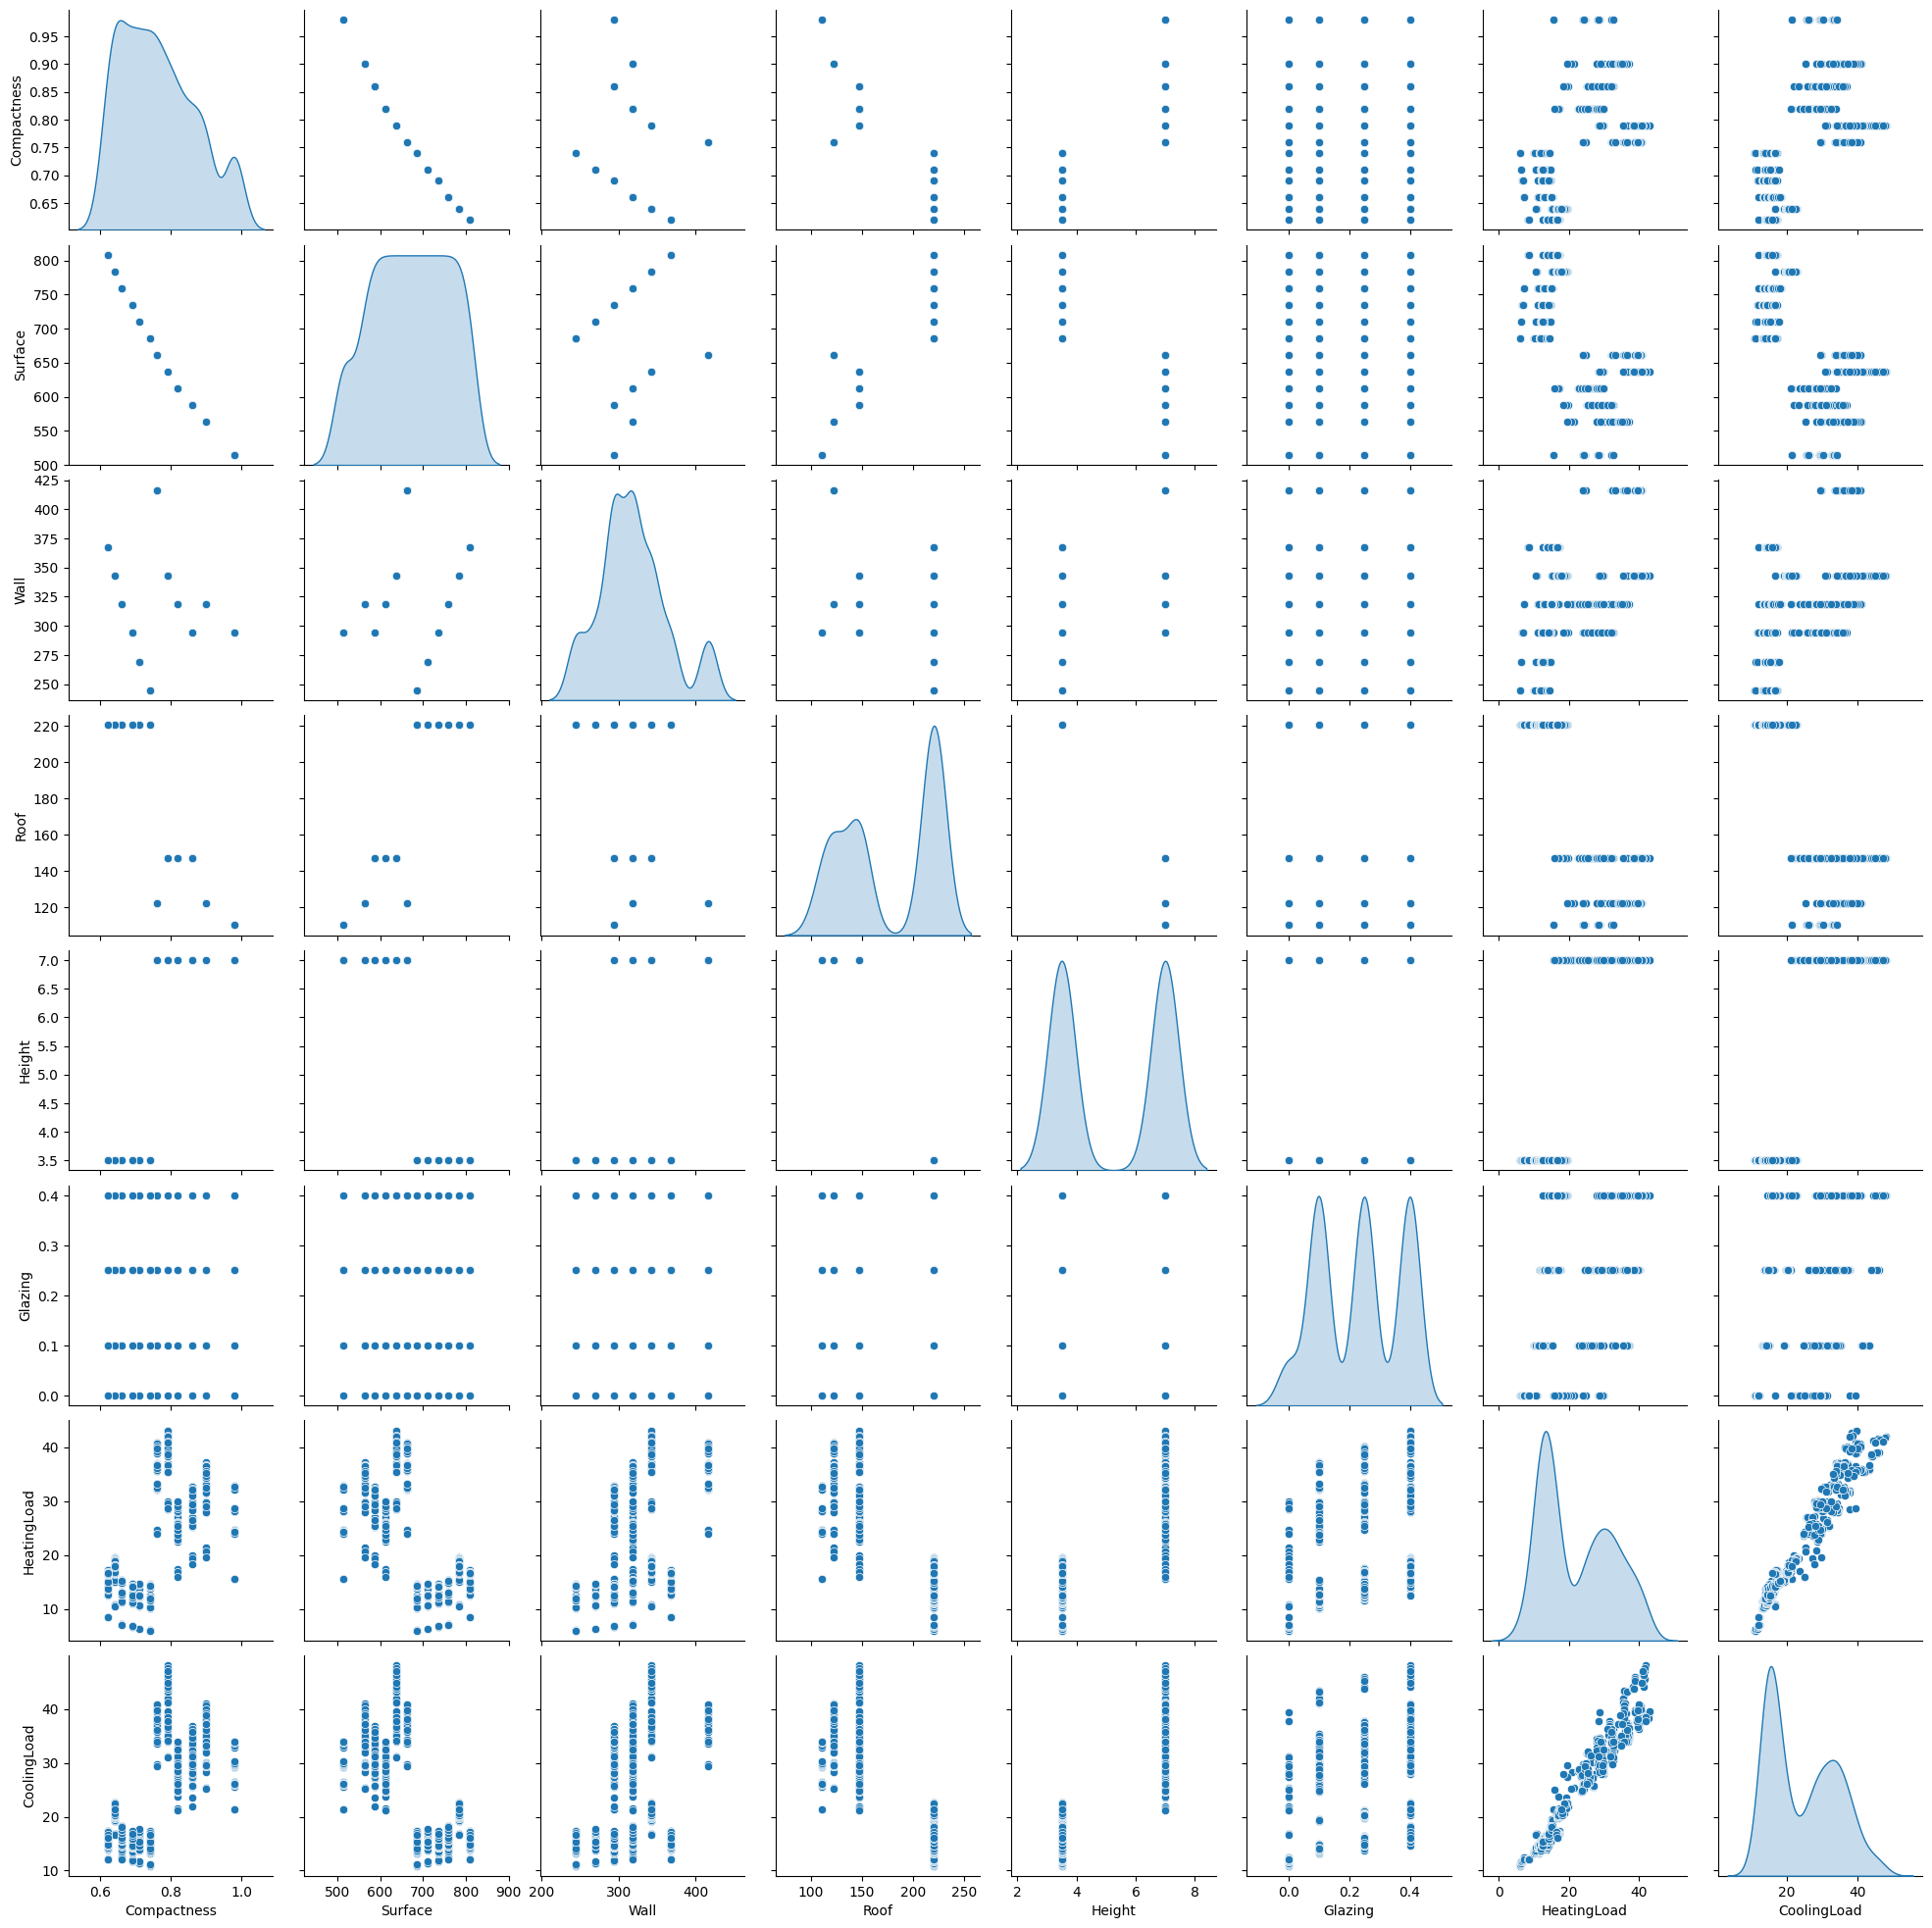

In [71]:
sns.pairplot(df[["Compactness","Surface","Wall","Roof","Height","Glazing","HeatingLoad","CoolingLoad"]], 
             diag_kind="kde")
plt.show()

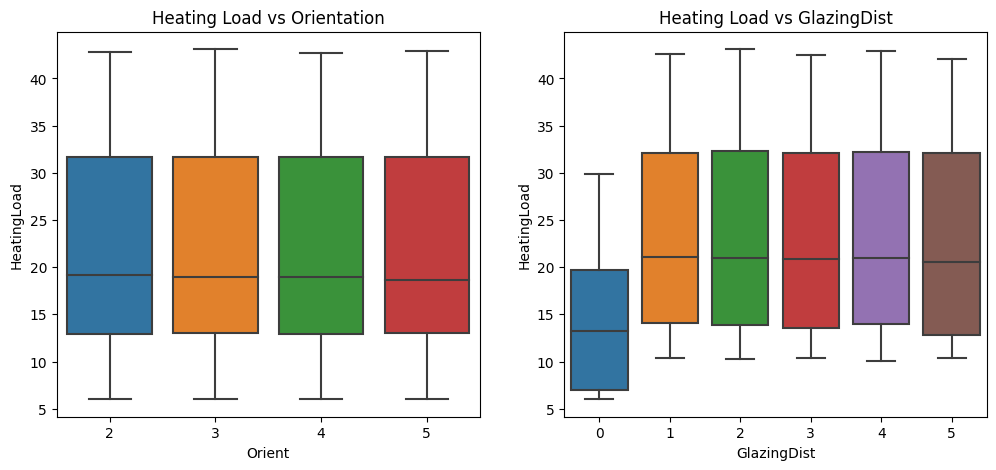

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x="Orient", y="HeatingLoad", data=df, ax=axes[0])
axes[0].set_title("Heating Load vs Orientation")

sns.boxplot(x="GlazingDist", y="HeatingLoad", data=df, ax=axes[1])
axes[1].set_title("Heating Load vs GlazingDist")
plt.show()

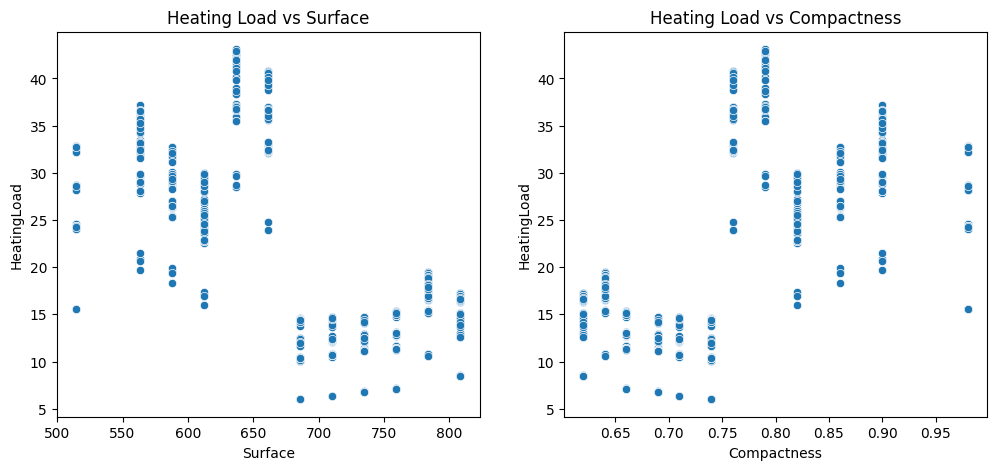

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x="Surface", y="HeatingLoad", data=df, ax=axes[0])
axes[0].set_title("Heating Load vs Surface")

sns.scatterplot(x="Compactness", y="HeatingLoad", data=df, ax=axes[1])
axes[1].set_title("Heating Load vs Compactness")
plt.show()

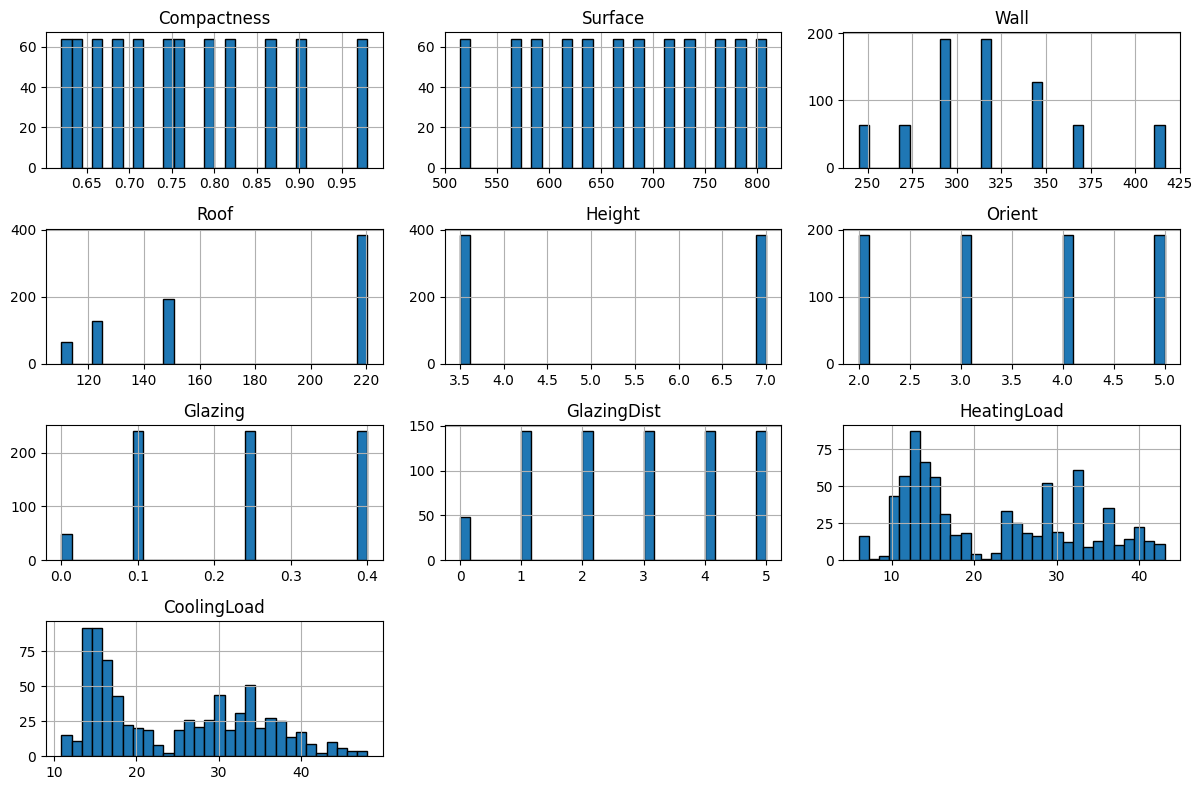

In [74]:
df.hist(figsize=(12,8), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

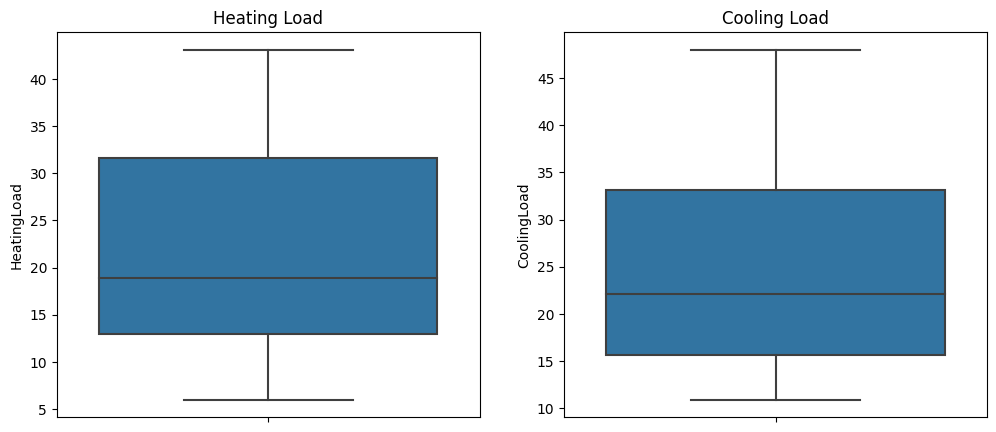

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(y=df["HeatingLoad"], ax=axes[0])
axes[0].set_title("Heating Load")
sns.boxplot(y=df["CoolingLoad"], ax=axes[1])
axes[1].set_title("Cooling Load")
plt.show()


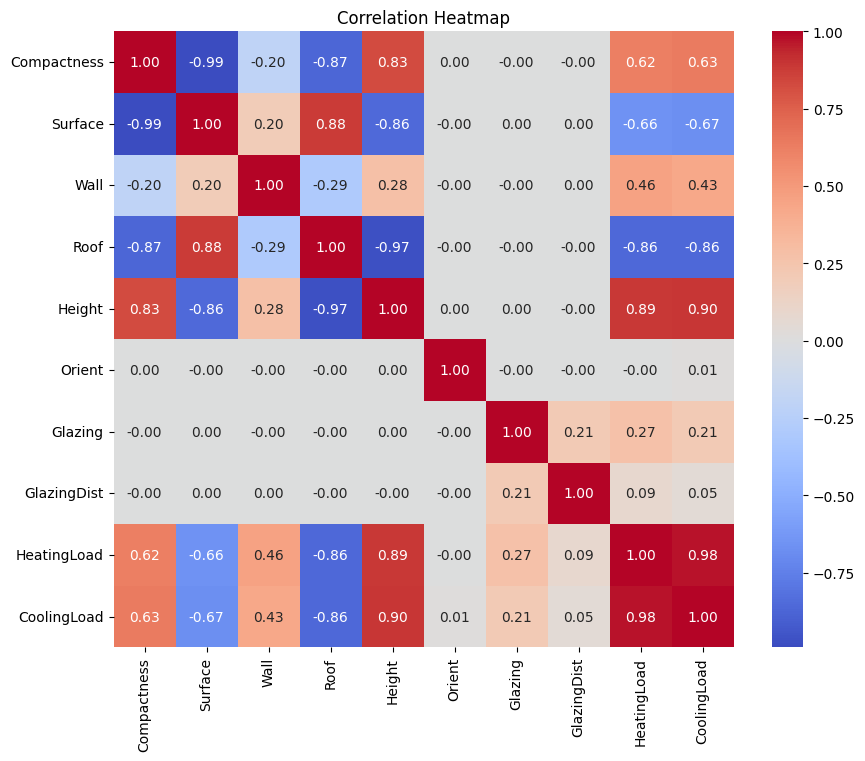

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


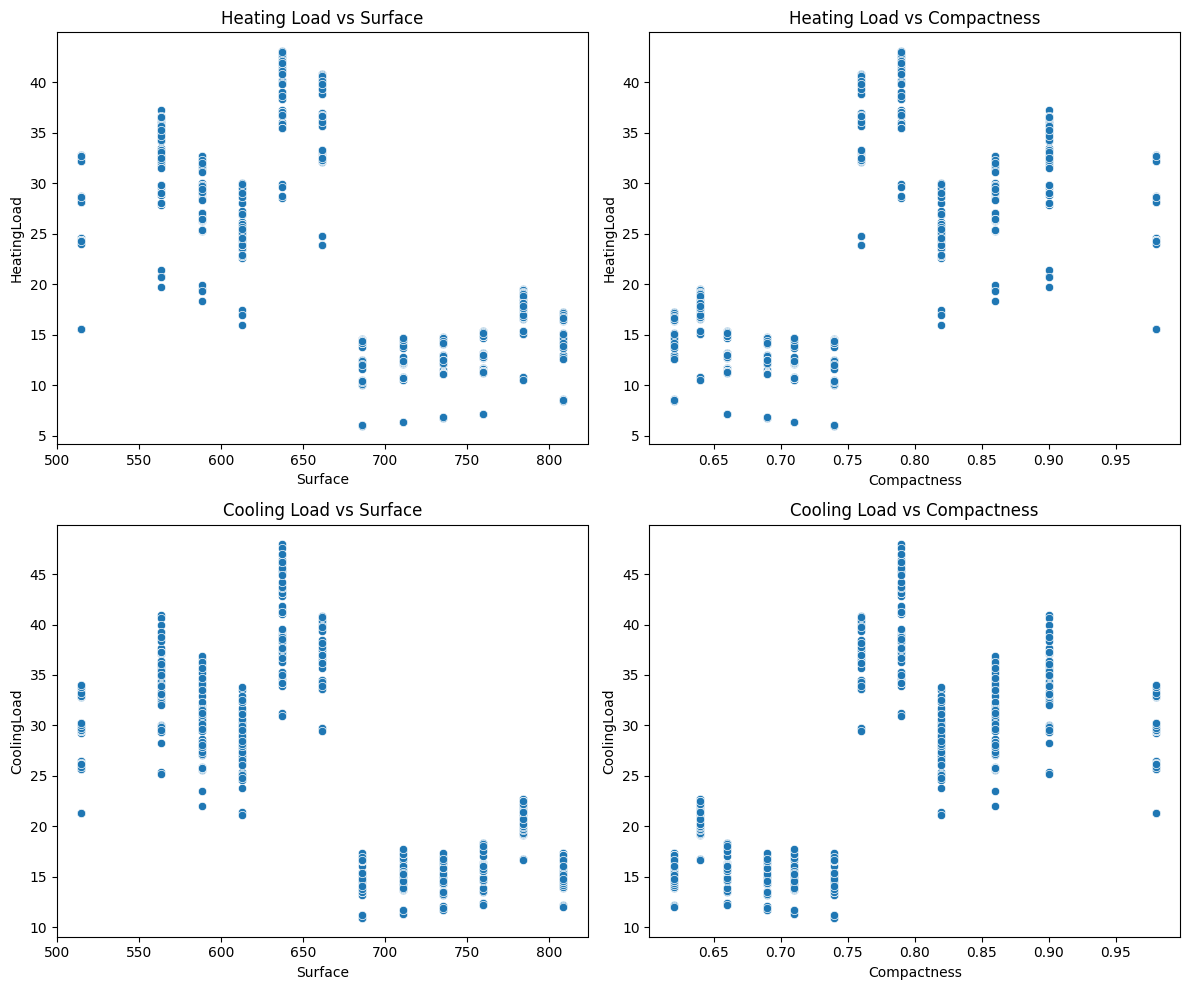

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(x="Surface", y="HeatingLoad", data=df, ax=axes[0,0])
axes[0,0].set_title("Heating Load vs Surface")

sns.scatterplot(x="Compactness", y="HeatingLoad", data=df, ax=axes[0,1])
axes[0,1].set_title("Heating Load vs Compactness")

sns.scatterplot(x="Surface", y="CoolingLoad", data=df, ax=axes[1,0])
axes[1,0].set_title("Cooling Load vs Surface")

sns.scatterplot(x="Compactness", y="CoolingLoad", data=df, ax=axes[1,1])
axes[1,1].set_title("Cooling Load vs Compactness")

plt.tight_layout()
plt.show()


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop(["HeatingLoad","CoolingLoad"], axis=1)
y = df["HeatingLoad"]  

In [80]:
X = pd.get_dummies(X, columns=["Orient","GlazingDist","Height"], drop_first=True)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape, X_test.shape

((614, 14), (154, 14))

In [83]:
num_cols = ["Compactness","Surface","Wall","Roof","Glazing"]
cat_cols = ["Orient","GlazingDist","Height"]

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),            
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = df.drop(["HeatingLoad","CoolingLoad"], axis=1)
y = df["HeatingLoad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import r2_score, mean_squared_error

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: 0.920848505580741
RMSE: 2.872295759280086


In [87]:
from lightgbm import LGBMRegressor

In [88]:
from sklearn.pipeline import Pipeline

lgbm_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LGBMRegressor(random_state=42))
])

In [89]:
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

print("R²:", r2_score(y_test, y_pred_lgbm))
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm, squared=False))

R²: 0.9978448288260389
RMSE: 0.4739586811634722


In [91]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.920848505580741
RMSE: 2.872295759280086


In [92]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
param_dist = {
    "num_leaves": np.arange(20, 121, 10),
    "max_depth": [-1, 5, 7, 9, 12],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "n_estimators": [300, 600, 1000],
    "min_child_samples": [1, 5, 10, 20],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0.0, 0.1, 0.5, 1.0],
    "reg_lambda": [0.0, 0.1, 0.5, 1.0],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMRegressor(random_state=42, verbosity=-1)

rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=40,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

rs.fit(X_train, y_train)

y_pred = rs.predict(X_test)
print("Best Params:", rs.best_params_)
print("CV Best RMSE:", -rs.best_score_)
print("Test R2:", r2_score(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

fi = pd.Series(rs.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi.head(15)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

rand.fit(X_train, y_train)

best_model = rand.best_estimator_
best_params = rand.best_params_
cv_best_rmse = -rand.best_score_

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Params:", best_params)
print("CV Best RMSE:", cv_best_rmse)
print("Test R2:", r2)
print("Test RMSE:", rmse)